https://engcourses-uofa.ca/books/introduction-to-solid-mechanics/calculus/vector-calculus/

3.1.5


<IPython.core.display.Javascript object>


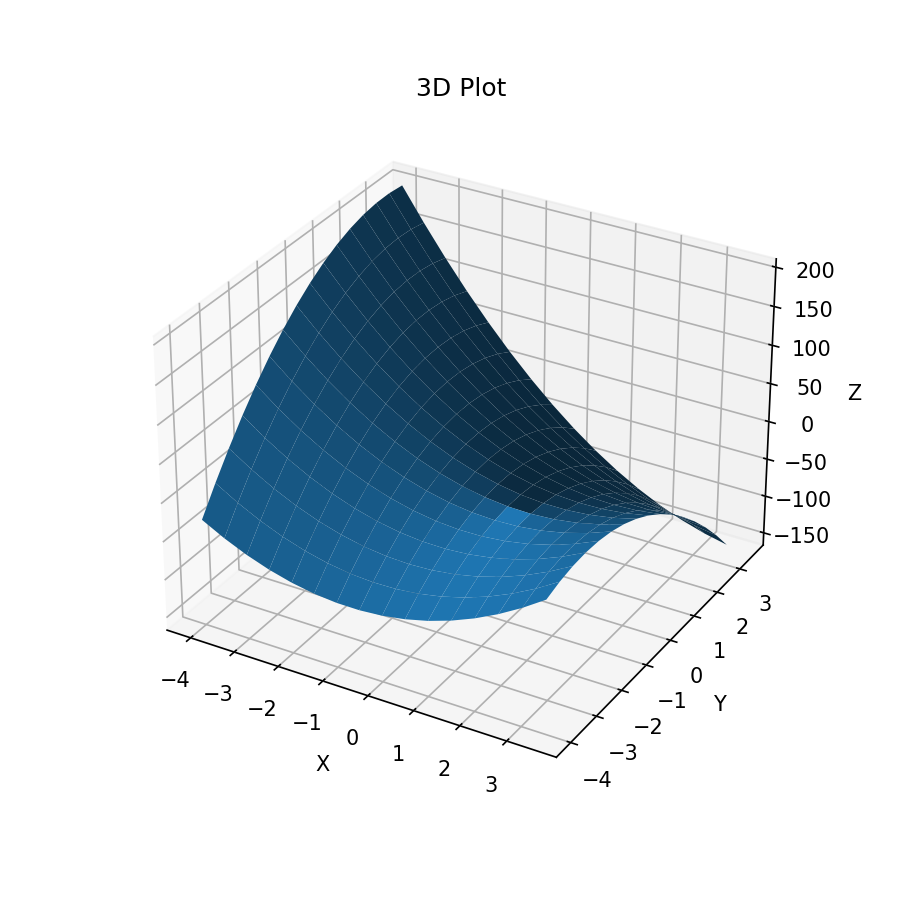

<IPython.core.display.Javascript object>


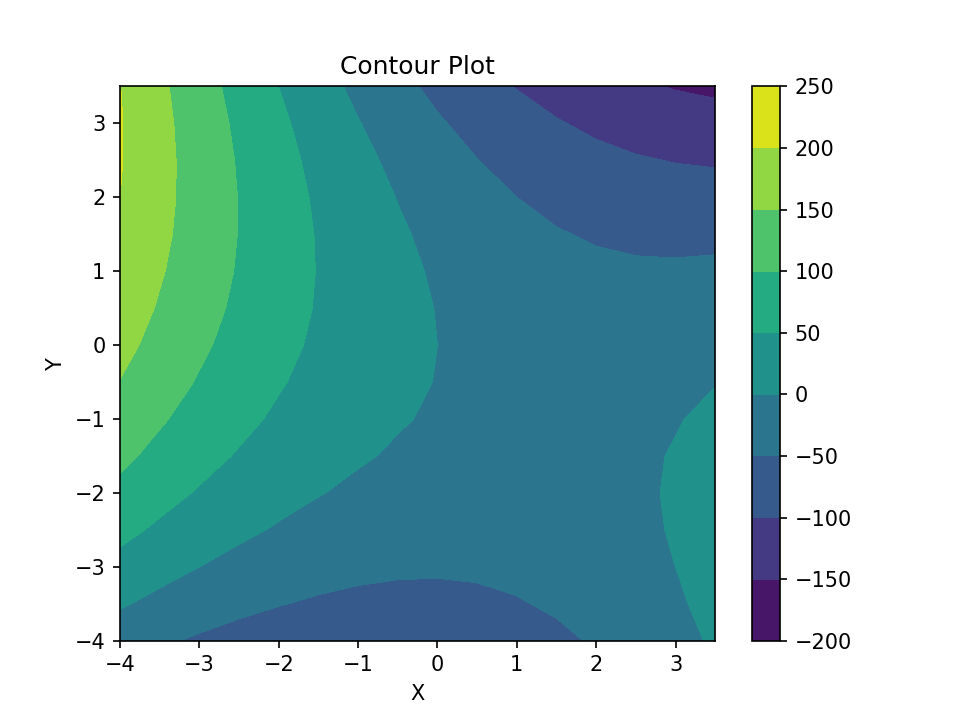

<IPython.core.display.Javascript object>


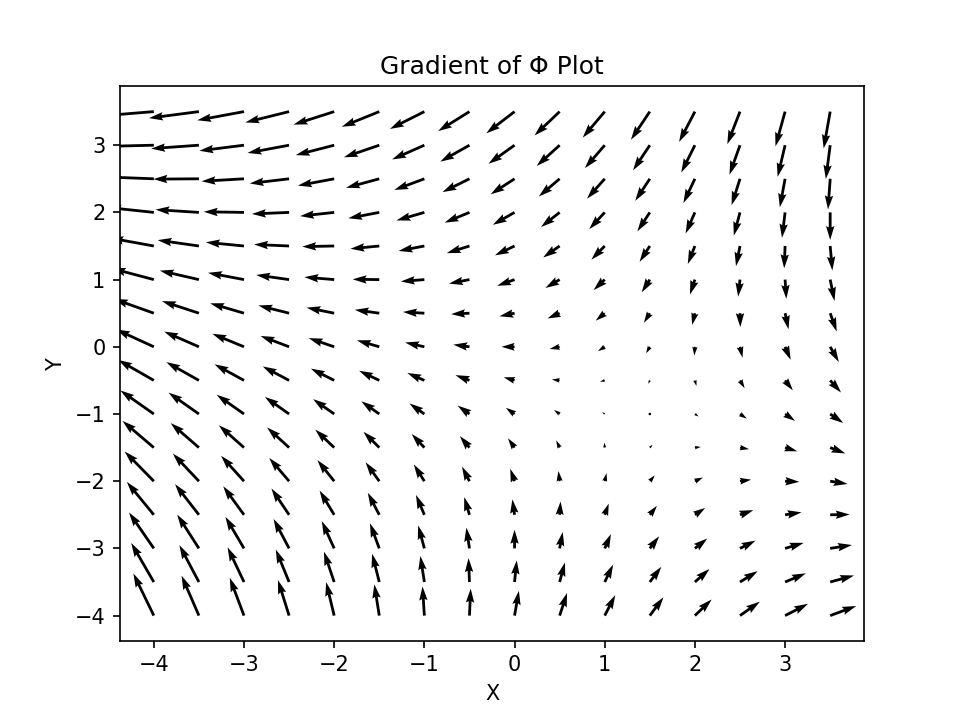

<IPython.core.display.Javascript object>


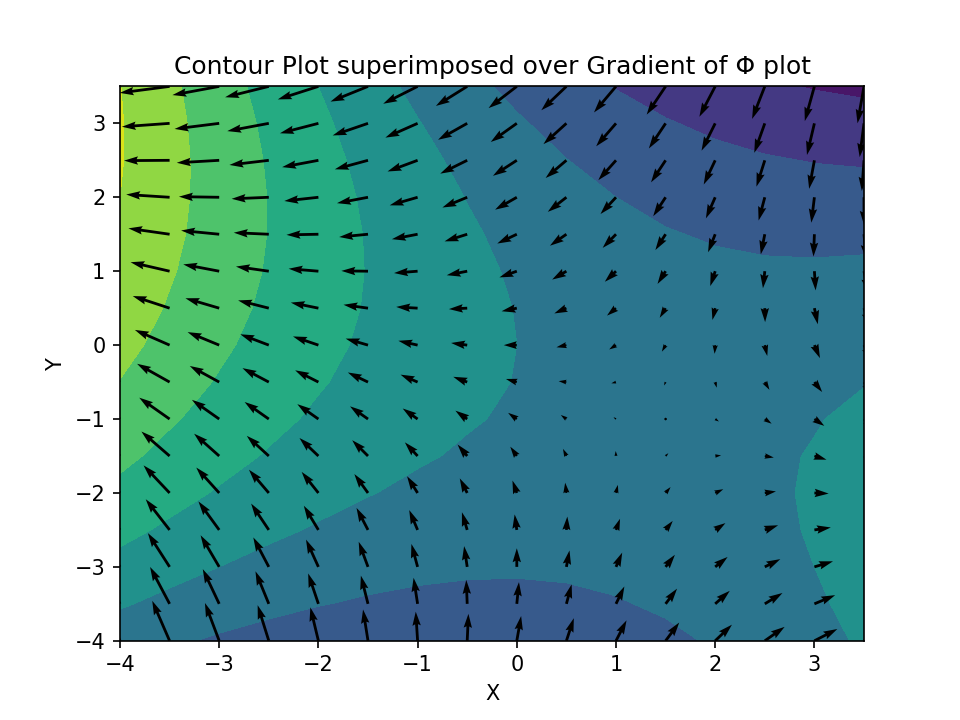

<IPython.core.display.Javascript object>


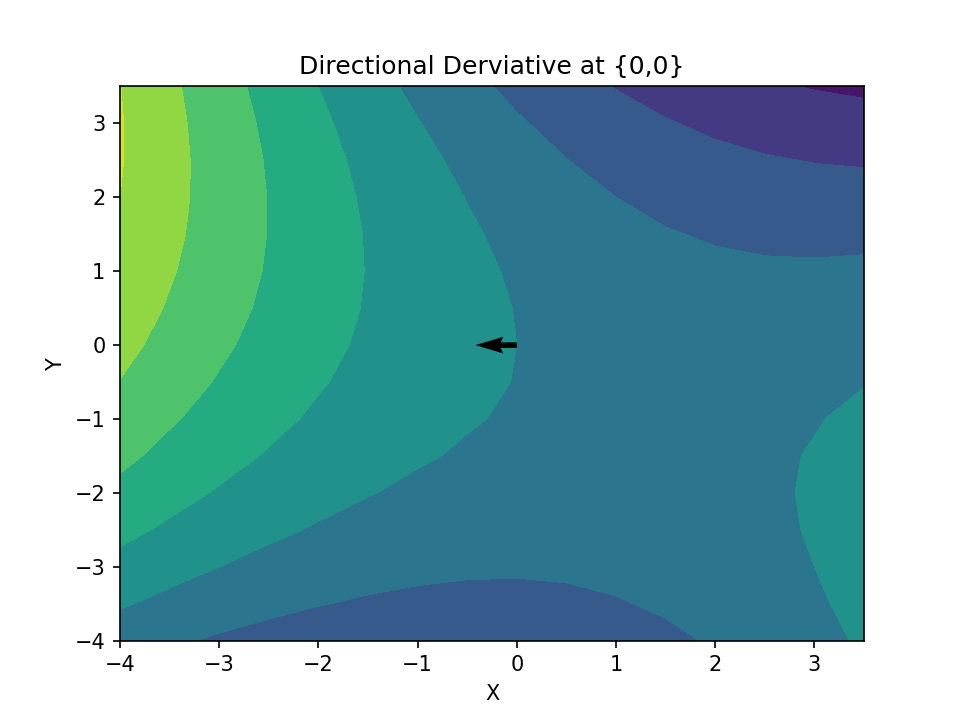

Delta Φ at (0,0) =
 [[-21.]
 [ -0.]]


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
# Function
F = lambda x, y: 5*x**2 - 7*x*(y + 3) - 5*y**2
# Gradient
dFx = lambda x, y: 10*x-7*(y+3)
dFy = lambda x, y: -7*x-10*y
# range
x = np.arange(-4, 4, .5)
y = np.arange(-4, 4, .5)
X, Y = np.meshgrid(x, y)
# output
Z = F(X,Y)
dX, dY = dFx(X,Y), dFy(X,Y)
# 3D plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)
plt.title('3D Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Contour plot
fig = plt.figure()
ax = fig.add_subplot(111)
cp = ax.contourf(X,Y,Z)
fig.colorbar(cp)
plt.title('Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
# Gradient plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(X, Y, dX, dY)
plt.title('Gradient of \u03A6 Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
# Contour Plot superimposed over Gradient
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X,Y,Z)
ax.quiver(X, Y, dX, dY)
plt.title('Contour Plot superimposed over Gradient of \u03A6 plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
#Directional Derviative at {0,0}
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X,Y,Z)
x_0 = np.where(x == 0)[0][0]
y_0 = np.where(y == 0)[0][0]
phi = np.array([[dX.item(x_0,y_0)],[dY.item(x_0, y_0)] ])
ax.quiver(X[x_0, y_0], Y[x_0, y_0], dX.item(x_0,y_0),dY.item(x_0, y_0))
plt.title('Directional Derviative at {0,0}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
#outputs 
print("Delta \u03A6 at (0,0) =\n", phi)

3.3.3

In [3]:
import sympy as sp
from sympy import diff, simplify
from sympy.matrices import Matrix
sp.init_printing(use_latex = "mathjax")
x1,x2 = sp.symbols('x_1 x_2')
r, theta = sp.symbols('r \u03B8')
u1 = x1**2+x2**2
u2 = x1*x2
# cartesian coordinate system
u = Matrix([u1,u2])
display("u =",u)
x = Matrix([x1,x2])
# gradient
grad_u = Matrix([[diff(ui,xj) for xj in x] for ui in u])
display("\u2207u =",grad_u)
# Change of variables
display("The following is a simple change of variables but the components are still in the cartesian coordinate system")
urth = u.subs([(x1, r*sp.cos(theta)), (x2, r*sp.sin(theta))])
display("u_r_\u03B8 =",urth,simplify(urth))
# gradient
grad_u_rth = grad_u.subs([(x1, r*sp.cos(theta)), (x2, r*sp.sin(theta))])
display("\u2207u_r_\u03B8 =",grad_u_rth)
# rot matrix
Q = Matrix([[sp.cos(theta),sp.sin(theta)],[-sp.sin(theta),sp.cos(theta)]])
display("Q =",Q)
# Change of coordinates
display("The following representation is in the radial coordinate system")
upolar=simplify(Q*urth)
grad_u_polar=simplify(Q*grad_u_rth*Q.T)
display("u' = Q*u =",upolar)
display("\u2207u' = Q*\u2207u*Q^T =",grad_u_polar)
# Gradient formula in the polar coordinate system
display("The gradient can also be calculated using the gradient formula")
grad_u_formula = Matrix([[diff(upolar[0],r),diff(upolar[0],theta)/r-upolar[1]/r],
                [diff(upolar[1],r),upolar[0]/r+diff(upolar[1],theta)/r]])
grad_u_formula = simplify(grad_u_formula)
display(grad_u_formula)

'u ='

⎡  2     2⎤
⎢x₁  + x₂ ⎥
⎢         ⎥
⎣  x₁⋅x₂  ⎦

'∇u ='

⎡2⋅x₁  2⋅x₂⎤
⎢          ⎥
⎣ x₂    x₁ ⎦

'The following is a simple change of variables but the components are still in the cartesian coordinate system'

'u_r_θ ='

⎡ 2    2       2    2   ⎤
⎢r ⋅sin (θ) + r ⋅cos (θ)⎥
⎢                       ⎥
⎢    2                  ⎥
⎣   r ⋅sin(θ)⋅cos(θ)    ⎦

⎡     2     ⎤
⎢    r      ⎥
⎢           ⎥
⎢ 2         ⎥
⎢r ⋅sin(2⋅θ)⎥
⎢───────────⎥
⎣     2     ⎦

'∇u_r_θ ='

⎡2⋅r⋅cos(θ)  2⋅r⋅sin(θ)⎤
⎢                      ⎥
⎣ r⋅sin(θ)    r⋅cos(θ) ⎦

'Q ='

⎡cos(θ)   sin(θ)⎤
⎢               ⎥
⎣-sin(θ)  cos(θ)⎦

'The following representation is in the radial coordinate system'

"u' = Q*u ="

⎡ 2 ⎛   2       ⎞       ⎤
⎢r ⋅⎝sin (θ) + 1⎠⋅cos(θ)⎥
⎢                       ⎥
⎢        2    3         ⎥
⎣      -r ⋅sin (θ)      ⎦

"∇u' = Q*∇u*Q^T ="

⎡    ⎛   2       ⎞                          ⎤
⎢2⋅r⋅⎝sin (θ) + 1⎠⋅cos(θ)  r⋅sin(θ)⋅cos(2⋅θ)⎥
⎢                                           ⎥
⎢              3                            ⎥
⎣      -2⋅r⋅sin (θ)        r⋅cos(θ)⋅cos(2⋅θ)⎦

'The gradient can also be calculated using the gradient formula'

⎡    ⎛   2       ⎞                          ⎤
⎢2⋅r⋅⎝sin (θ) + 1⎠⋅cos(θ)  r⋅sin(θ)⋅cos(2⋅θ)⎥
⎢                                           ⎥
⎢              3                            ⎥
⎣      -2⋅r⋅sin (θ)        r⋅cos(θ)⋅cos(2⋅θ)⎦